In [1]:
import numpy as np
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

In [3]:
class Config:
    nn_input_dim = 2  # input layer dimensionality
    nn_output_dim = 2  # output layer dimensionality
    # Gradient descent parameters (I picked these by hand)
    epsilon = 0.01  # learning rate for gradient descent
    reg_lambda = 0.01 # regularization strength

In [5]:
def generate_data():
    np.random.seed(0)
    X, y = datasets.make_moons(200, noise=0.20)
    return X, y

In [6]:

def visualize(X, y, model):
    # plt.scatter(X[:, 0], X[:, 1], s=40, c=y, cmap=plt.cm.Spectral)
    # plt.show()
    plt.title("four layers Neural Net")
    plot_decision_boundary(lambda x:predict(model,x), X, y)


In [7]:
def plot_decision_boundary(pred_func, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y)#, cmap=plt.cm.Spectral)
    plt.show()


In [9]:
def calculate_loss(model, X, y):
    num_examples = len(X)  # training set size
    #W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    W1, b1, W2, b2, W3, b3 = model['W1'], model['b1'], model['W2'], model['b2'], model['W3'], model['b3']  ### 4layers
    # Forward propagation to calculate our predictions
    z1 = X.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    #exp_scores = np.exp(z2)
    a2 = np.tanh(z2)            ### 4layers
    z3 = a2.dot(W3) + b3        ### 4layers
    exp_scores = np.exp(z3)     ### 4layers
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    # Calculating the loss
    corect_logprobs = -np.log(probs[range(num_examples), y])
    data_loss = np.sum(corect_logprobs)
    # Add regulatization term to loss (optional)
    #data_loss += Config.reg_lambda / 2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    data_loss += Config.reg_lambda / 2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)) + np.sum(np.square(W3)))  ###
    return 1. / num_examples * data_loss

In [10]:
def predict(model, x):
    #W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    W1, b1, W2, b2, W3, b3 = model['W1'], model['b1'], model['W2'], model['b2'], model['W3'], model['b3']  ### 4layers
    # Forward propagation
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    #exp_scores = np.exp(z2)
    a2 = np.tanh(z2)            ### 4layers
    z3 = a2.dot(W3) + b3        ### 4layers
    exp_scores = np.exp(z3)     ### 4layers
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return np.argmax(probs, axis=1)

In [12]:
# - print_loss: If True, print the loss every 1000 iterations
def build_model(X, y, nn_hdim, num_passes=20000, print_loss=False):
    # Initialize the parameters to random values. We need to learn these.
    num_examples = len(X)
    np.random.seed(0)
    W1 = np.random.randn(Config.nn_input_dim, nn_hdim) / np.sqrt(Config.nn_input_dim)
    b1 = np.zeros((1, nn_hdim))
    #W2 = np.random.randn(nn_hdim, Config.nn_output_dim) / np.sqrt(nn_hdim)
    #b2 = np.zeros((1, Config.nn_output_dim))
    W2 = np.random.randn(nn_hdim, nn_hdim) / np.sqrt(nn_hdim)
    b2 = np.zeros((1, nn_hdim))
    W3 = np.random.randn(nn_hdim, Config.nn_output_dim) / np.sqrt(nn_hdim)
    b3 = np.zeros((1, Config.nn_output_dim))

    decay = 1.                              ###
    # This is what we return at the end
    model = {}

    # Gradient descent. For each batch...
    for i in range(0, num_passes):

        # Forward propagation
        z1 = X.dot(W1) + b1
        a1 = np.tanh(z1)
        z2 = a1.dot(W2) + b2
        # exp_scores = np.exp(z2)
        a2 = np.tanh(z2)  ### 4layers
        z3 = a2.dot(W3) + b3  ### 4layers
        exp_scores = np.exp(z3)  ### 4layers
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

        # Backpropagation
        #delta3 = probs
        #delta3[range(num_examples), y] -= 1
        delta4 = probs                                      ###
        delta4[range(num_examples), y] -= 1                 ###
        dW3 = (a2.T).dot(delta4)                            ###
        db3 = np.sum(delta4, axis=0, keepdims=True)         ###
        delta3 = delta4.dot(W3.T) * (1 - np.power(a2, 2))   ###
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
        dW1 = np.dot(X.T, delta2)
        db1 = np.sum(delta2, axis=0)

        # Add regularization terms (b1 and b2 don't have regularization terms)
        dW3 += Config.reg_lambda * W3                       ###
        dW2 += Config.reg_lambda * W2
        dW1 += Config.reg_lambda * W1

        # Gradient descent parameter update
        W1 += -Config.epsilon * dW1 * decay
        b1 += -Config.epsilon * db1 * decay
        W2 += -Config.epsilon * dW2 * decay
        b2 += -Config.epsilon * db2 * decay
        W3 += -Config.epsilon * dW3 * decay                        ###
        b3 += -Config.epsilon * db3 * decay                        ###

        # Assign new parameters to the model
        #model = {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}

        # Optionally print the loss.
        # This is expensive because it uses the whole dataset, so we don't want to do it too often.
        if print_loss and i % 1000 == 0:
            model = {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2, 'W3': W3, 'b3': b3}  ###
            print("Loss after iteration %i: %f" % (i, calculate_loss(model, X, y)))
            #decay *= 0.8

    model = {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2, 'W3': W3, 'b3': b3}  ###
    return model

In [14]:
def classify(X, y):
    # clf = linear_model.LogisticRegressionCV()
    # clf.fit(X, y)
    # return clf

    pass

In [16]:
def main():
    X, y = generate_data()
    #mask = np.random.choice(200, 50)                                ### add 1 line
    #model = build_model(X[mask], y[mask], 3, print_loss=True)       ### add [mask]
    model = build_model(X, y, 3, print_loss=True)
    visualize(X, y, model)

Loss after iteration 0: 0.471233
Loss after iteration 1000: 0.060126
Loss after iteration 2000: 0.059230
Loss after iteration 3000: 0.064547
Loss after iteration 4000: 0.061661
Loss after iteration 5000: 0.060537
Loss after iteration 6000: 0.061042
Loss after iteration 7000: 0.063132
Loss after iteration 8000: 0.062305
Loss after iteration 9000: 0.052323
Loss after iteration 10000: 0.051477
Loss after iteration 11000: 0.051029
Loss after iteration 12000: 0.051537
Loss after iteration 13000: 0.056647
Loss after iteration 14000: 0.046484
Loss after iteration 15000: 0.064996
Loss after iteration 16000: 0.046669
Loss after iteration 17000: 0.045631
Loss after iteration 18000: 0.049889
Loss after iteration 19000: 0.054381


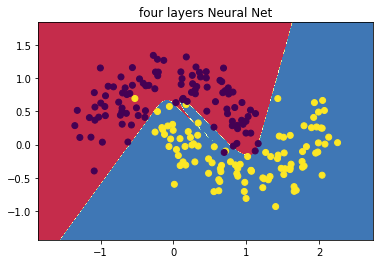

In [17]:
main()